In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
%matplotlib inline

In [82]:
df1 = pd.read_excel('divorce.xlsx')

In [83]:
df1.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [84]:
df1.describe()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


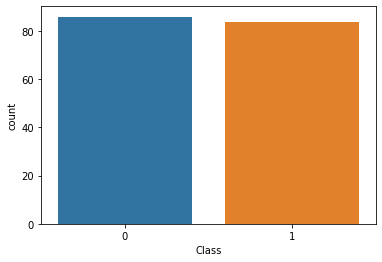

In [85]:
ax = sns.countplot(x='Class', data=df1);

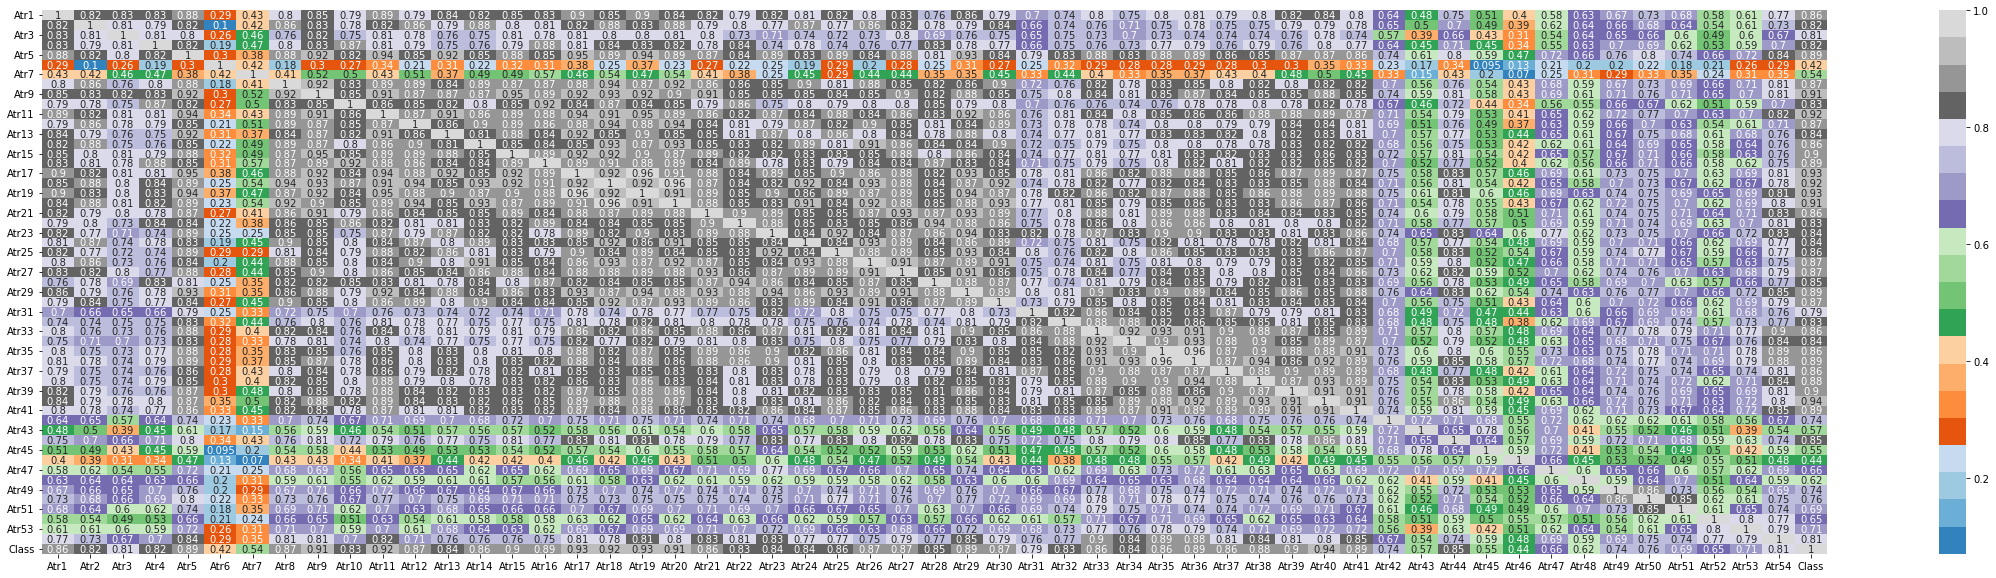

In [86]:
plt.figure(figsize = (40,10))
plot = sns.heatmap(df1.corr(), annot = True, cmap='tab20c')
#plt.savefig('output.png')
plt.show()

In [87]:
from sklearn.neural_network import MLPClassifier

In [88]:
x = df1.drop(['Class'], axis = 1)
y = df1['Class']
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

In [56]:
clf.fit(x, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [89]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [90]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(9), activation='relu', max_iter=500)
mlp.fit(x_train,y_train)

predict_train = mlp.predict(x_train)
predict_test = mlp.predict(x_test)

In [80]:
predict_test

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [92]:
mlp.score(x_test,y_test)

0.9117647058823529

In [61]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[67  0]
 [ 0 69]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        69

    accuracy                           1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136



In [62]:
a = df1.iloc[160,0:54]

In [78]:
a.shape

(54,)

In [64]:
df1.shape

(170, 55)

In [65]:
b = a.values.reshape(1,-1)

In [66]:
b

array([[2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 0,
        0, 3, 2, 2, 1, 1, 1, 1, 2, 1]], dtype=int64)

In [67]:
b.shape

(1, 54)

In [68]:
mlp.predict(b)

array([0], dtype=int64)

In [69]:
import pickle

In [70]:
x = np.array([['Q1', 'Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15','Q16',
              'Q17','Q18','Q19','Q20','Q21','Q22','Q23','Q24','Q25','Q26','Q27','Q28','Q29','Q30','Q31',
               'Q32','Q33','Q34','Q35','Q36','Q37','Q38','Q39','Q40','Q41','Q42','Q43','Q44','Q45','Q46',
               'Q47','Q48','Q49','Q50','Q51','Q52','Q53','Q54']])
x
Q1=Q2=Q3=Q4=Q5=Q6=Q7=Q8=Q9=Q10=Q11=Q12=Q13=Q14=Q15=Q16=Q17=Q18=Q19=Q20=Q21=Q22=Q23=Q24=Q25=Q26=Q27=Q28=Q29=Q30=Q31=Q32=Q33=Q34=Q35=Q36=Q37=Q38=Q39=Q40=Q41=Q42=Q43=Q44=Q45=Q46=Q47=Q48=Q49=Q50=Q51=Q52=Q53=Q54=Q55=0



In [71]:
y_pred = mlp.predict(b)

In [72]:
#x[:,0] = Q1.transform(x[:,0])
#x[:,1] = Q2.transform(x[:,1])
#x = x.astypr(float)
x

array([['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
        'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
        'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28',
        'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37',
        'Q38', 'Q39', 'Q40', 'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46',
        'Q47', 'Q48', 'Q49', 'Q50', 'Q51', 'Q52', 'Q53', 'Q54']],
      dtype='<U3')

In [73]:
import pickle

In [74]:
data = {'model':mlp, 'Q1':Q1, 'Q2':Q1, 'Q3':Q3,'Q4':Q4,'Q5':Q5,'Q6':Q6,'Q7':Q7,'Q8':Q8,'Q9':Q9
       ,'Q10':Q10,'Q11':Q11,'Q12':Q12,'Q13':Q13,'Q14':Q14,'Q15':Q15,'Q16':Q16,'Q17':Q17,'Q18':Q18,
        'Q19':Q19,'Q20':Q20,'Q21':Q21,'Q22':Q22,'Q23':Q23,'Q24':Q24,'Q25':Q25,'Q26':Q26,'Q27':Q27,
       'Q28':Q28,'Q29':Q29,'Q30':Q30,'Q31':Q31,'Q32':Q32,'Q33':Q33,'Q34':Q34,'Q35':Q35,'Q36':Q36,
        'Q37':Q37,'Q38':Q38,'Q39':Q39,'Q40':Q40,'Q41':Q41,'Q42':Q42,'Q43':Q43,'Q44':Q44,'Q45':Q45,
       'Q46':Q46,'Q47':Q47,'Q48':Q48,'Q49':Q49,'Q50':Q50,'Q51':Q51,'Q52':Q52,'Q53':Q53,'Q54':Q54}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [75]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)
    
model = data['model']
Q1 = data['Q1']
Q2 = data['Q2']

In [76]:
y_pred = model.predict(b)

In [77]:
model

MLPClassifier(hidden_layer_sizes=9, max_iter=500)

In [93]:
from sklearn.feature_selection import RFE

In [98]:
model = mlp

In [115]:
rfe  = RFE(model, n_features_to_select=3)
rfe.fit(x_train,y_train)
#print("Num Features: %s" % (fit.n_features_))
#print("Selected Features: %s" % (fit.support_))
#print("Feature Ranking: %s" % (fit.ranking_))

ValueError: when `importance_getter=='auto'`, the underlying estimator MLPClassifier should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

In [109]:
x

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54
0,2,2,4,1,0,0,0,0,0,0,...,3,2,1,3,3,3,2,3,2,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,2,3,4,4,4,4,2,2
2,2,2,2,2,1,3,2,1,1,2,...,2,3,2,3,1,1,1,2,2,2
3,3,2,3,2,3,3,3,3,3,3,...,3,2,2,3,3,3,3,2,2,2
4,2,2,1,1,1,1,0,0,0,0,...,2,2,1,2,3,2,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,0,1,0,4,1,1,4,2,2,2
166,0,0,0,0,0,0,0,0,0,0,...,3,4,1,2,2,2,2,3,2,2
167,1,1,0,0,0,0,0,0,0,1,...,2,3,0,2,0,1,1,3,0,0
168,0,0,0,0,0,0,0,0,0,0,...,4,3,3,2,2,3,2,4,3,1


In [116]:
def permutation_importances(rf, X_train, y_train, metric): 
    baseline = metric(rf, X_train, y_train)
    imp = []
    for col in X_train.columns:
        save = X_train[col].copy()
        X_train[col] = np.random.permutation(X_train[col])
        m = metric(rf, X_train, y_train)
        X_train[col] = save
        imp.append(baseline - m)
    return np.array(imp)

In [119]:
permutation_importances(model, x_train,y_train,accuracy)

NameError: name 'accuracy' is not defined